<a href="https://www.kaggle.com/code/mohamedbakrey/day-3-to-learn-pytroch-differentiation-in-pytorc?scriptVersionId=105311568" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border:2px solid #030833; border-radius:15px;  background:#ffffff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:12px; background:#410F01; text-align:center;">
        <span style="font-family:sans-serif; font-size:50px; color:#fef;">Differentiation in PyTorch </span>
    </div>
</div>

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Objective... 📥 </span>
    </div>
</div>

<ul><li> How to perform differentiation in pytorch.</li></ul> 

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Table of Contents... 📥 </span>
    </div>
</div>
 
 
 <ul>
    <li><a href="https://#Derivative">Derivatives</a></li>
    <li><a href="https://#Partial_Derivative">Partial Derivatives</a></li>
</ul>



<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#510F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Preparation... 📥 </span>
    </div>
</div>

In [2]:
# These are the libraries will be useing for this lab.

import torch 
import matplotlib.pylab as plt

<h2 id="Derivative">Derivatives</h2>

Let us create the tensor <code>x</code> and set the parameter <code>requires_grad</code> to true because you are going to take the derivative of the tensor.


In [6]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


Then let us create a tensor according to the equation $ y=x^2 $.


In [7]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


Then let us take the derivative with respect x at x = 2


In [8]:
# Take the derivative. Try to print out the derivative at the value x = 2

y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


The preceding lines perform the following operation:

<h4><center>$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$</center></h4>

<h4><center>$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$</center></h4>


In [9]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [10]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7fb48f437b50>
grad: None
is_leaf: False
requires_grad: True


/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


Let us try to calculate the derivative for a more complicated function.


In [11]:
# Calculate the y = x^2 + 2x + 1, then find the derivative 

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


The function is in the following form:
$y=x^{2}+2x+1$

The derivative is given by:

<h4><center>$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$</center></h4>

<h4><center>$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$</center></h4>

<h4><center>$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$</center></h4>

<h4><center>$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$</center></h4>


We can implement our own custom autograd Functions by subclassing
torch.autograd.Function and implementing the forward and backward passes
which operate on Tensors


In [12]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [16]:
# We can apply it the function
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print("Y is the Result: \n",y.grad_fn)
y.backward()
x.grad

Y is the Result: 


tensor(4.)

<h2 id="Partial_Derivative">Partial Derivatives</h2>


We can also calculate <b>Partial Derivatives</b>. Consider the function: $f(u,v)=vu+u^{2}$



In [17]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


This is equivalent to the following:

<h4><center>$f(u=1,v=2)=(2)(1)+1^{2}=3$</center></h4>


In [18]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


the expression is given by:

<h4><center>$\frac{\mathrm{\partial f(u,v)}}{\partial {u}}=v+2u$</center></h4>

<h4><center>$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {u}}=2+2(1)=4$</center></h4>





In [19]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)


The equation is given by:

<h4><center>$\frac{\mathrm{\partial f(u,v)}}{\partial {v}}=u$</center></h4>

<h4><center>$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {v}}=1$</center></h4>



Calculate the derivative with respect to a function with multiple values as follows. we use the sum trick to produce a scalar valued function and then take the gradient:


In [24]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

We can plot the function  and its derivative


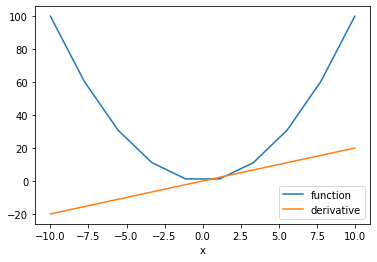

In [25]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [38]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 3
y = torch.sum(x ** 2)

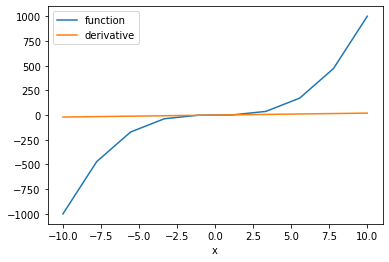

In [39]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

The orange line is the slope of the blue line at the intersection point, which is the derivative of the blue line.


The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array. To understand the sum operation  <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2022-01-01">Click Here</a>


The <b>relu</b> activation function is an essential function in neural networks. We can take the derivative as follows:


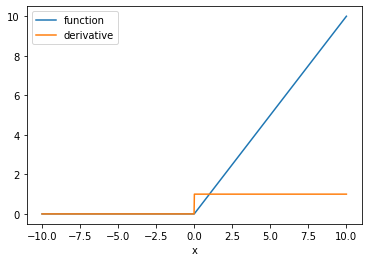

In [41]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#510F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Summary... 📥 </span>
    </div>
</div>

In this work, we work on explaining the basics that are used in deep learning using PyTroch


* You can find the first day  [here](https://www.kaggle.com/code/mohamedbakrey/day-1-to-learn-pytroch-torch-tensors-in-1d?rvi=1)
* You can find the second day [here](https://www.kaggle.com/code/mohamedbakrey/day-2-to-learn-pytroch-two-dimensional-tensors)